### 1. IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud
import os
import glob

### 2. LOAD TEXT FILES

#### 2.1 MULTIPLE FILES OPTION
(optional. Currently not used)

In [43]:
# path = os.getcwd() + "/"

# file_list = glob.glob(f"{path}*.txt")

# file_big = path + 'allnotes.txt'
# with open(file_big, 'wb') as fnew:
#     for f in file_list:
#         with open(f, 'rb') as fold:
#             for line in fold:
#                 fnew.write(line)
#                 fnew.write("\n".encode(encoding='utf_8'))

#### 2.2 SINGLE FILE OPTION

In [48]:
file = 'allnotes.txt'

In [49]:
with open(file, 'r', encoding='utf-8') as f:
    nota = f.readlines()
    
nota = '\n'.join(nota)
nota = nota.replace('\n'," ")

In [50]:
body = nota

body_words = body.lower().split()
body_words_clean = []
for word in body_words:
    body_words_clean.append(word.strip("().,/:'"))

def dicc_frec(iter):
    aux = []
    stats = {}
    for word in iter:
        if word not in aux and len(word) > 4:
            stats[word] = body.count(word.lower())
        aux.append(word.lower())
    return stats

stats = dicc_frec(body_words_clean)

stats = sorted(stats.items(), key=lambda item: item[1], reverse=True)
stats_df = pd.DataFrame(stats, columns = ["word","count"])

### 3. WORDS COUNT QUICKLOOK

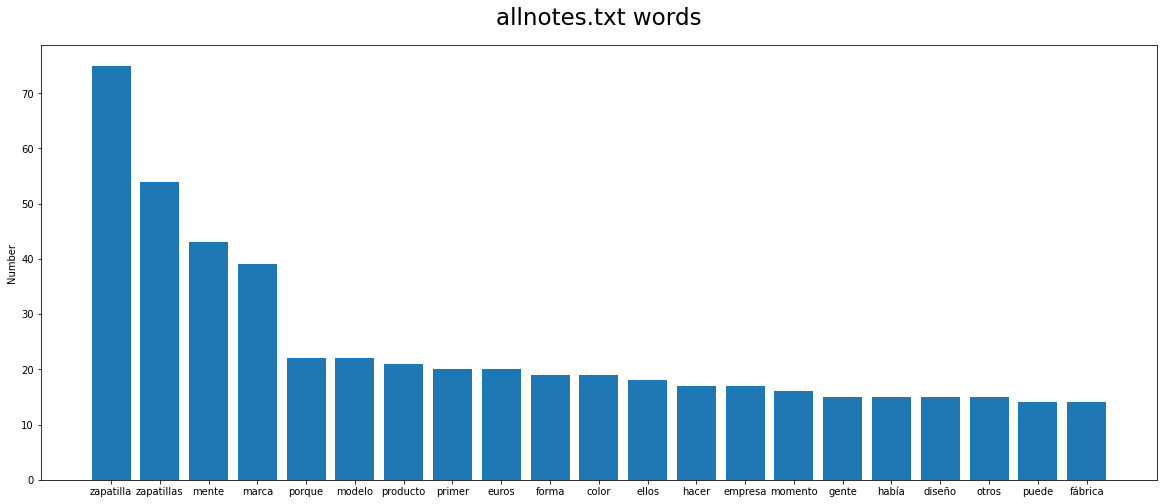

In [56]:
fig, ax = plt.subplots(figsize = (20,8))
ax.set_title(f"{file} words", fontsize = 23, pad = 20)
ax.bar(stats_df.loc[:20,"word"], stats_df.loc[:20,"count"])
ax.set_ylabel("Number")
plt.show()

### 4. IMPORT MASK IMAGE AS AN ARRAY

In [57]:
# mask = np.array(Image.open(f"{path}/shoe_mask.jpg"))
mask = np.array(Image.open(f"shoe_mask.jpg"))
mask.shape

(590, 1518)

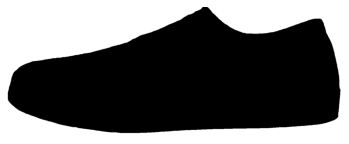

In [58]:
plt.imshow(mask, cmap = "gray")
plt.axis("off")
plt.show()

In [23]:
def transform_format(val):
    if val == 0:
        return 1
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

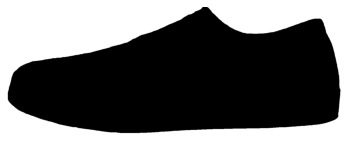

In [24]:
plt.imshow(transformed_mask, cmap = "gray")
plt.axis("off")
plt.show()

### 5. REMOVE GENERAL WORDS THAT ARE NOT NEEDED AND PLOT

In [25]:
#DELETE COMMAS AT THE END OF EVERY WORD IN BODY LIST (AFTER SPLITTING)
body2 = []
for word in body.split():
    body2.append(word.strip(","))

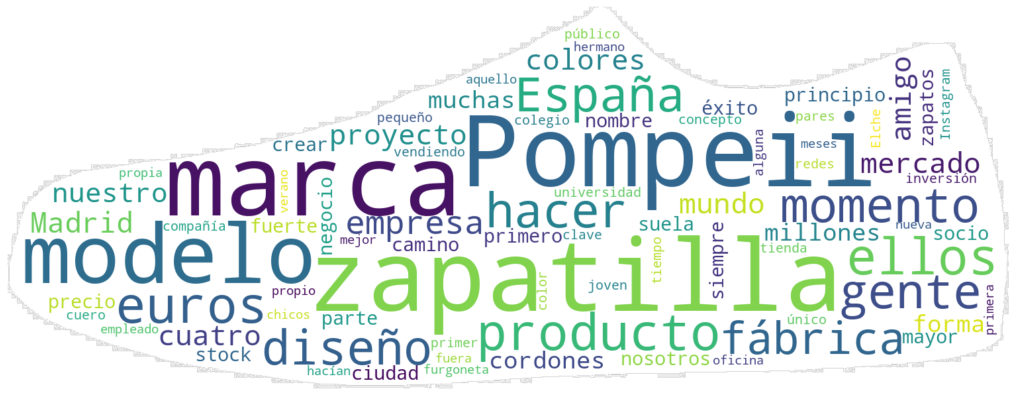

In [31]:
# stopwords = []
stopwords = ['tenía', 'dónde', 'estos', 'tampoco', 'antes', 'tienen','Cosme', 'después', 'mucha', 'mucho', 'mismo', 'todos', 'querían', 'queríamos', 'llegar', 'comenta', 'donde','están','cuenta', 'según', 'también','dieron', 'hecho', 'desde','Arturo', 'otros', 'puede', 'Porque','tiene','entre', 'había', 'grandes', 'tener', 'ahora', 'hasta', 'aunque', 'estaba', 'explica', 'porque', 'además', 'Ganso', 'cuando', 'Jaime', 'Garrastazu', 'Nacho', 'Jorge', 'Vidri']
for word in body2:
    if len(word) < 5 or word.isalpha() == False:
        stopwords.append(word)

fig, ax = plt.subplots(figsize=(18,8))       

wordcloud = WordCloud(background_color="white", max_words=80, regexp = None, width = 5000,
                      contour_width=0.0001, contour_color = "lightgray", normalize_plurals = True,
                      min_word_length = 5, relative_scaling=0, include_numbers = True,
                      mask = transformed_mask, mode = "RGB", colormap = "viridis",
                      stopwords = stopwords, collocations = False, random_state = 10).generate(body)

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()

### 6. EXPORT AS PNG

In [ ]:
wordcloud.to_file(f"{path}/{file.split('.')[0]}.png")